
# 🧠 Support Vector Machines (SVM) Tutorial  

Support Vector Machines (SVM) are powerful supervised learning algorithms used for **classification** and **regression**.  
They work by finding the **optimal hyperplane** that maximizes the margin between classes.  

This notebook covers:  
- Key concepts of SVM  
- Linear SVM with visualization  
- Non-linear SVM with RBF kernel  
- 3D visualization of separating hyperplane in feature space  



## ✏️ Key Concepts in SVM  

1. **Hyperplane** – Decision boundary that separates classes.  
2. **Support Vectors** – Critical points that lie closest to the hyperplane.  
3. **Margin** – Distance between hyperplane and support vectors (we maximize this).  
4. **Kernels** – Transform data to higher dimensions (e.g., Polynomial, RBF).  
5. **Hard vs Soft Margin** – Whether misclassifications are allowed.  


## 🔹 Linear SVM Demo

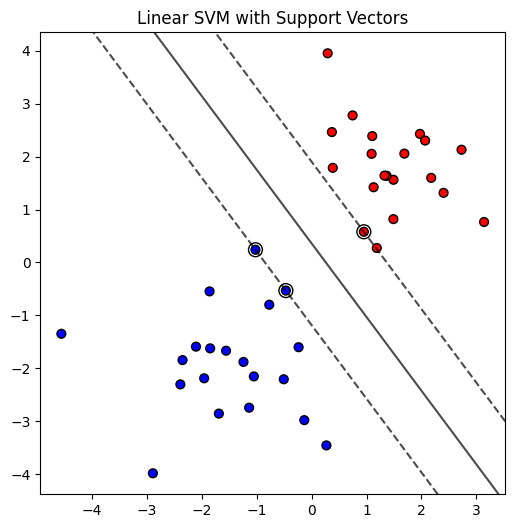

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate toy dataset (linearly separable)
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [0] * 20 + [1] * 20

# Train linear SVM
clf = SVC(kernel="linear", C=1E5)
clf.fit(X, y)

# Plot decision boundary
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=40, edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Draw decision boundary & margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title("Linear SVM with Support Vectors")
plt.show()


## 🔹 Non-linear SVM (RBF Kernel)

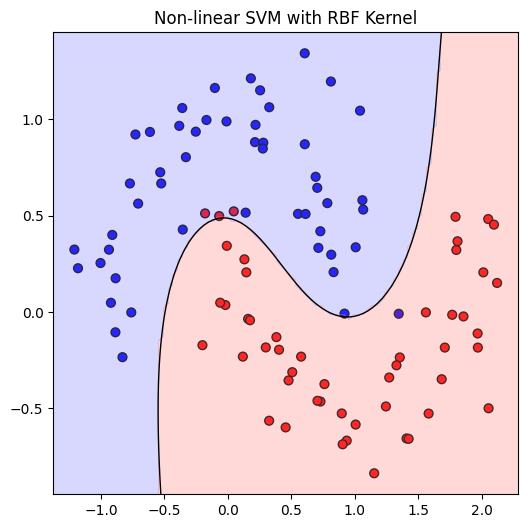

In [2]:

from sklearn.datasets import make_moons

# Two moons dataset (non-linear)
X, y = make_moons(n_samples=100, noise=0.2, random_state=0)

# Train SVM with RBF kernel
clf = SVC(kernel="rbf", C=1, gamma=1)
clf.fit(X, y)

# Plot decision regions
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=40, edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contourf(XX, YY, Z > 0, alpha=0.3, cmap='bwr')
ax.contour(XX, YY, Z, colors='k', levels=[0], linewidths=1)
plt.title("Non-linear SVM with RBF Kernel")
plt.show()


## 🔹 3D Visualization of Polynomial Feature Mapping

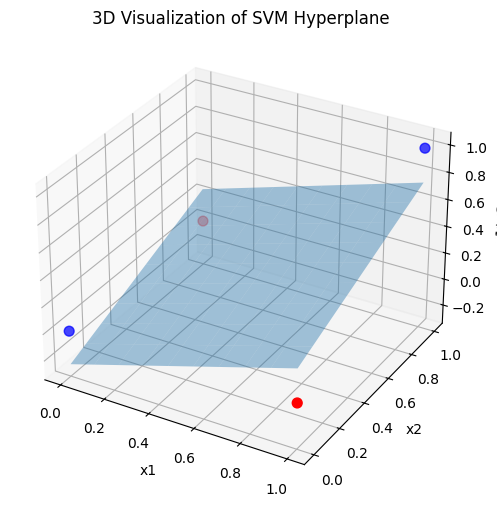

In [3]:

from mpl_toolkits.mplot3d import Axes3D

# Simple dataset (not linearly separable in 2D)
X = np.array([[0,0],[1,1],[1,0],[0,1]])
y = [0,0,1,1]

# Polynomial feature mapping (x1, x2, x1*x2)
X_poly = np.c_[X, X[:,0]*X[:,1]]

# Train linear SVM in 3D feature space
clf = SVC(kernel="linear", C=1E5)
clf.fit(X_poly, y)

# 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_poly[:,0], X_poly[:,1], X_poly[:,2], c=y, cmap='bwr', s=50)

# Create grid for plane
xx, yy = np.meshgrid(np.linspace(0,1,10), np.linspace(0,1,10))
zz = (-clf.coef_[0][0]*xx - clf.coef_[0][1]*yy - clf.intercept_[0]) / clf.coef_[0][2]

ax.plot_surface(xx, yy, zz, alpha=0.4)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x1*x2")
plt.title("3D Visualization of SVM Hyperplane")
plt.show()



## ✅ Advantages of SVM
- Effective in high dimensions  
- Memory efficient (uses support vectors)  
- Flexible with kernels  

## ⚠️ Limitations of SVM
- Slow for very large datasets  
- Sensitive to overlapping classes  
- Requires careful tuning of parameters  

---

### 🎯 Final Thoughts  
SVMs remain one of the most **powerful and interpretable algorithms**, especially for small to medium datasets.  
